##Tarea##

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [48]:
# Descargar datos de Bitcoin
from yahoo_fin.stock_info import get_data
stock = 'BTC-USD'
resolution = '1d'
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
BTC_df = get_data(stock, start_date=start_date, end_date=end_date, interval=resolution, index_as_date=False)

In [90]:

BTC_df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2023-04-16,30315.976562,30555.537109,30157.832031,30315.355469,30315.355469,1.285482e+10,BTC-USD
1,2023-04-17,30317.146484,30319.197266,29275.371094,29445.044922,29445.044922,1.787219e+10,BTC-USD
2,2023-04-18,29449.091797,30470.302734,29154.849609,30397.552734,30397.552734,1.948053e+10,BTC-USD
3,2023-04-19,30394.187500,30411.054688,28669.898438,28822.679688,28822.679688,2.457157e+10,BTC-USD
4,2023-04-20,28823.683594,29076.400391,28037.257812,28245.988281,28245.988281,2.134036e+10,BTC-USD


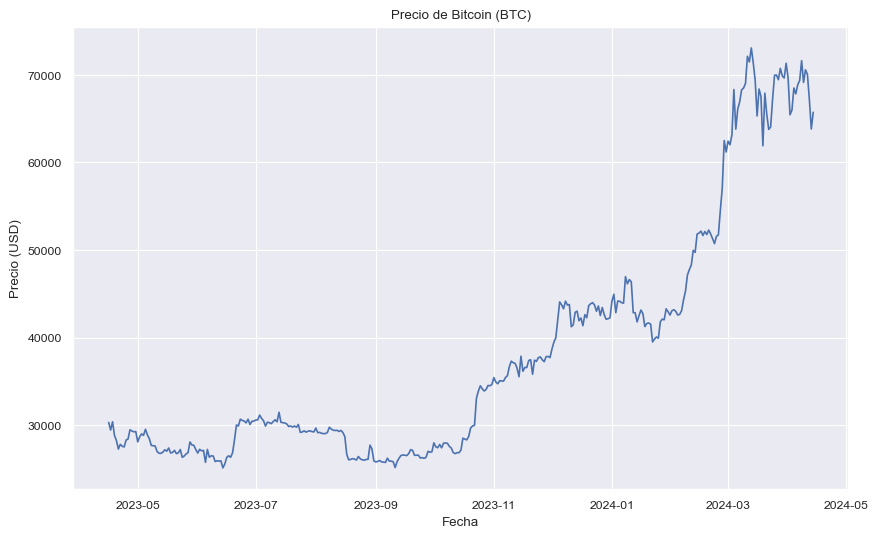

In [49]:
# Visualizar datos de Bitcoin
sns.lineplot(data=BTC_df, x=BTC_df.date, y=BTC_df.close)
plt.title('Precio de Bitcoin (BTC)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.show()

El Grafico muestra una tendencia positiva hacia la derecha el cual nos muestra un incremento del precio en USD amedida que transcurre el tiempo.

In [55]:
#Aqui elimino algunos valores faltantes.
BTC_df.dropna(inplace=True)
BTC_df['close'].fillna(method='ffill', inplace=True)  

In [56]:
# Prueba de estacionariedad (ADF)
result = adfuller(BTC_df.close)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.14347863334256136
p-value: 0.9449319788228996


In [89]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = BTC_df.date,
                                    open = BTC_df.open, 
                                    high = BTC_df.high,
                                    low = BTC_df.low, 
                                    close = BTC_df.close)
                    ])
fig.update_layout(
    title="BTC",
    xaxis_title="Day",
    yaxis_title="BTC-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig

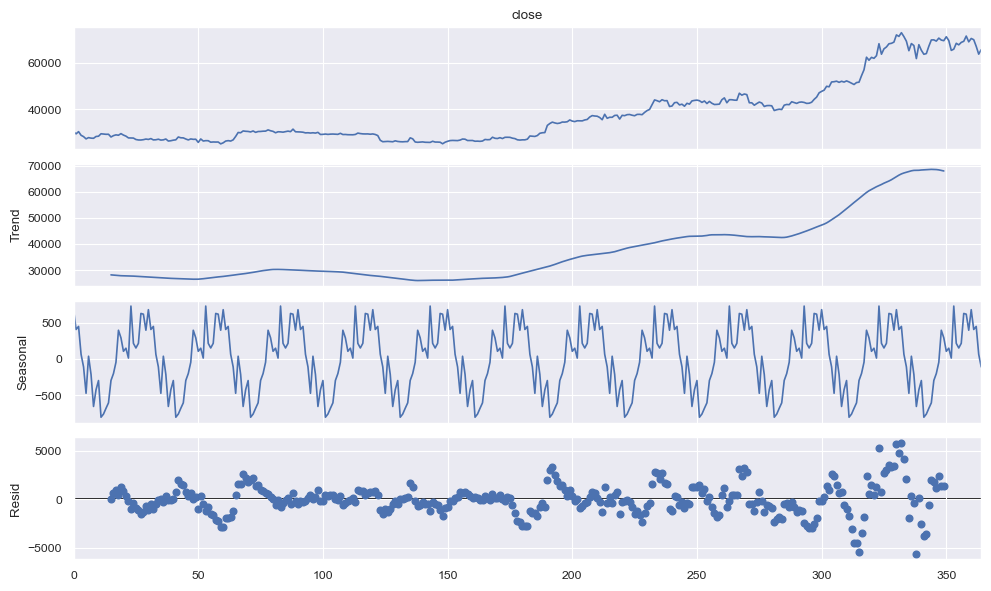

In [57]:
# Descomposición de la serie temporal
decomposition = seasonal_decompose(BTC_df.close, model='additive', period=30)
decomposition.plot()
plt.show()

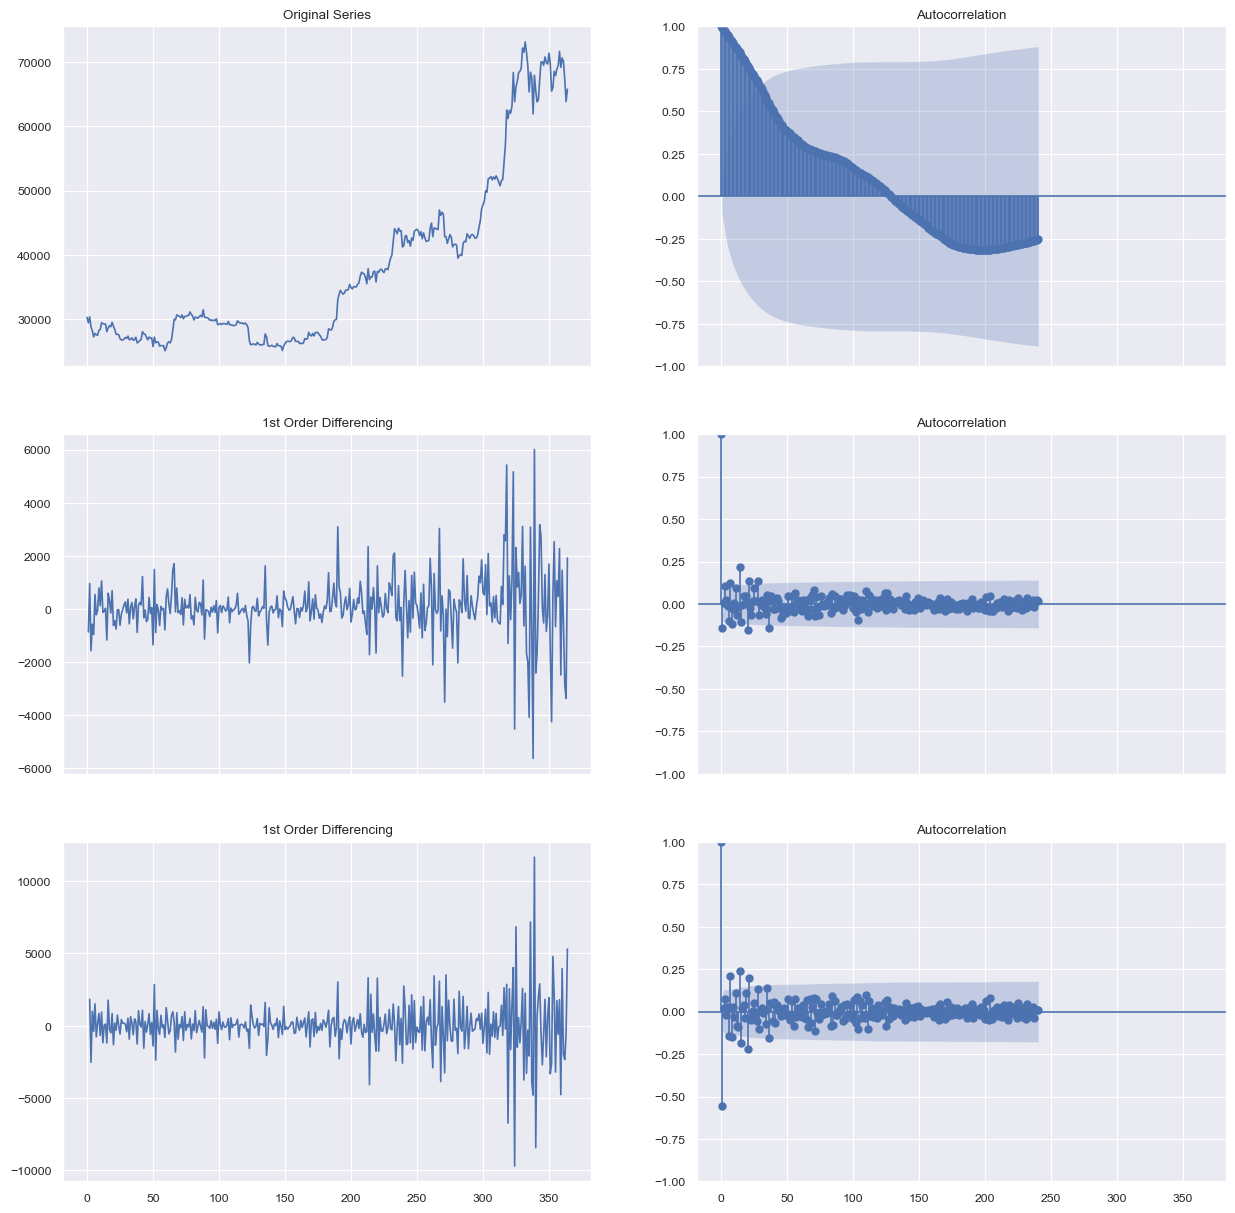

In [88]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(BTC_df.close); axes[0, 0].set_title('Original Series')
plot_acf(BTC_df.close, ax=axes[0, 1], lags = 240);

axes[1, 0].plot(BTC_df.close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(BTC_df.close.diff().dropna(), ax=axes[1, 1], lags = 240);

axes[2, 0].plot(BTC_df.close.diff().diff()); axes[2, 0].set_title('1st Order Differencing')
plot_acf(BTC_df.close.diff().diff().dropna(), ax=axes[2, 1], lags = 240);

In [58]:
# Dividir datos en entrenamiento y prueba
n_BTC = len(BTC_df.close)
n_test = 28
train_size = n_BTC - n_test
train = BTC_df.close[:train_size]

In [65]:
# Definir horizontes de predicción
horizons = [7, 14, 21, 28]

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.31 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.14 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5658.035, Time=0

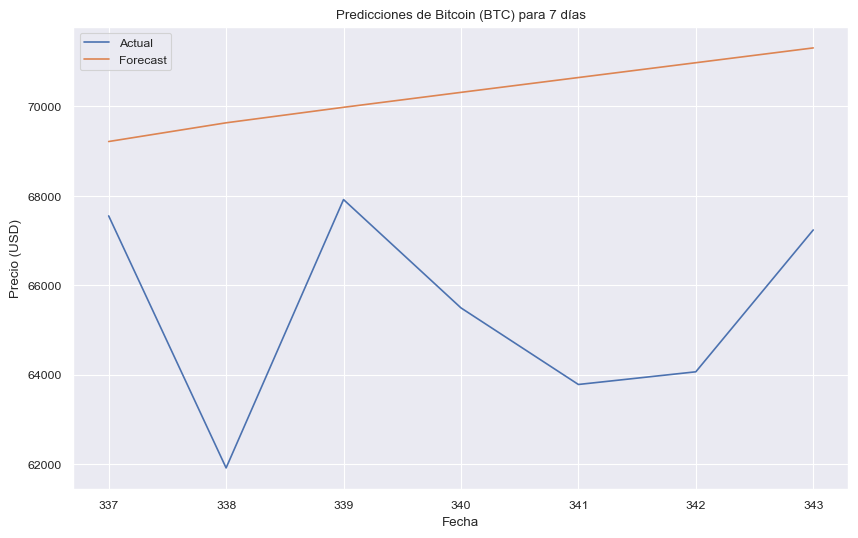

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.27 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.14 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5658.035, Time=0

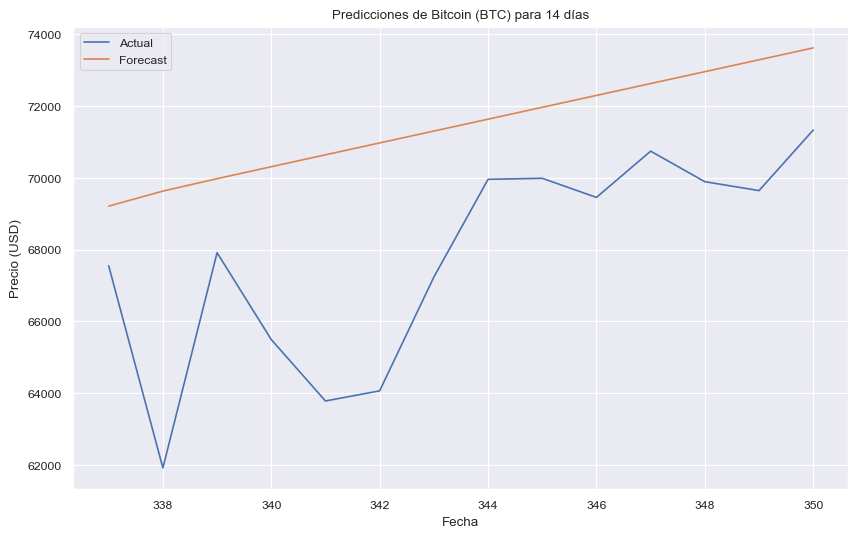

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5658.035, Time=0

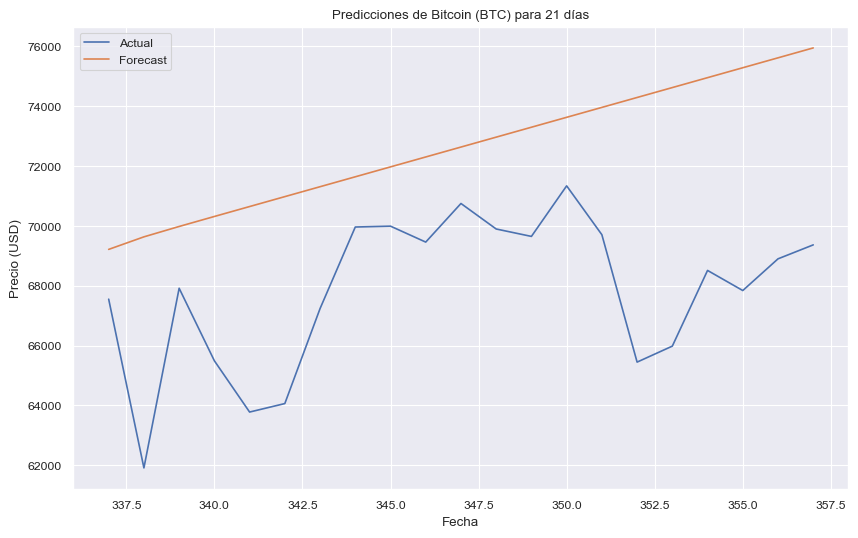

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.24 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.17 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=5658.035, Time=0

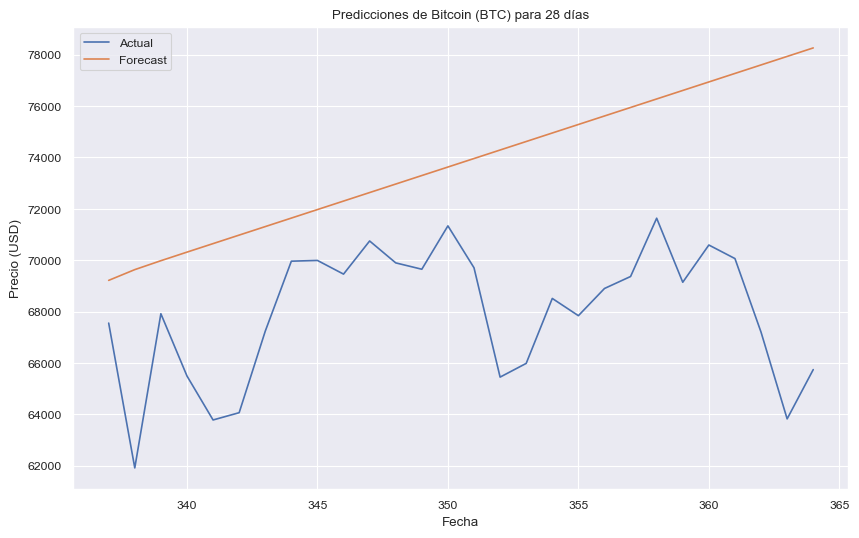

In [67]:
horizons = [7, 14, 21, 28]
# Iterar sobre cada horizonte de predicción
for horizon in horizons:
    # Modelado ARIMA
    model = auto_arima(train, seasonal=False, trace=True)

    # Ajustar modelo ARIMA
    model.fit(train)

    # Predicciones
    forecast = model.predict(n_periods=horizon)

    # Evaluar predicciones
    test = BTC_df.close[train_size:train_size + horizon]
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    mape = np.mean(np.abs((forecast - test) / test)) * 100
    rmse = np.sqrt(mse)

    print(f"Predicciones para {horizon} días:")
    print("Forecast:", forecast)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Mean Absolute Percentage Error:', mape)
    print('Root Mean Squared Error:', rmse)
    print("\n")

    # Visualizar predicciones
    plt.plot(test.index, test, label='Actual')
    plt.plot(test.index, forecast, label='Forecast')
    plt.title(f'Predicciones de Bitcoin (BTC) para {horizon} días')
    plt.xlabel('Fecha')
    plt.ylabel('Precio (USD)')
    plt.legend()
    plt.show()

* El modelo con el AIC más bajo se considera el mejor. En este caso, el mejor modelo fue ARIMA(1,2,1).
  Después de ajustar el modelo, se realizaron algunas predicciones para los próximos 7 días.
  se calcularon dos métricas de error para evaluar la precisión de las predicciones del modelo: el Error Porcentual Absoluto Medio (MAPE) fue del 7.56% y la Raíz del Error Cuadrático Medio (RMSE) fue de 5362.27
  Por lo tanto, la gráfica está mostrando una comparación entre los precios actuales del Bitcoin y las predicciones para los próximos siete días. Según la línea de pronóstico, se espera que el precio del Bitcoin aumente de manera más constante en el futuro cercano.
* El modelo con el AIC más bajo se considera el mejor. En este caso, el mejor modelo fue ARIMA(1,2,1).
  Después de ajustar el modelo, se realizaron algunas predicciones para los próximos 14 días.
  se calcularon dos métricas de error para evaluar la precisión de las predicciones del modelo: el Error Porcentual Absoluto Medio (MAPE) fue del 5.55% y la Raíz del Error Cuadrático Medio (RMSE) fue de 4205.43.
  la gráfica está mostrando una comparación entre los precios actuales del Bitcoin y las predicciones para los próximos 14 días. Según la línea de pronóstico, se espera que el precio del Bitcoin aumente de manera más constante en el futuro cercano.

Asi seria para los dias 21 y 28 dias seguira en umento

In [74]:
# Criterios de información
aic_criteria = ['aic', 'bic', 'hqic']

Horizonte de predicción: 7 días - Criterio de información: aic
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.14 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.09

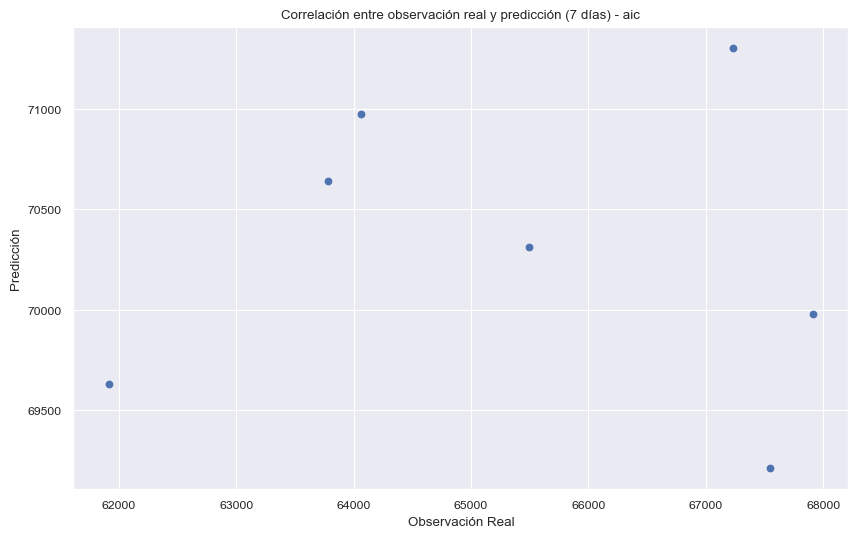

Horizonte de predicción: 7 días - Criterio de información: bic
Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=5837.699, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=5731.120, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=5681.386, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=5831.913, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : BIC=5677.662, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : BIC=5690.318, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.32 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : BIC=5672.110, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : BIC=5675.818, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : BIC=5684.618, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : BIC=inf, Time=0.10

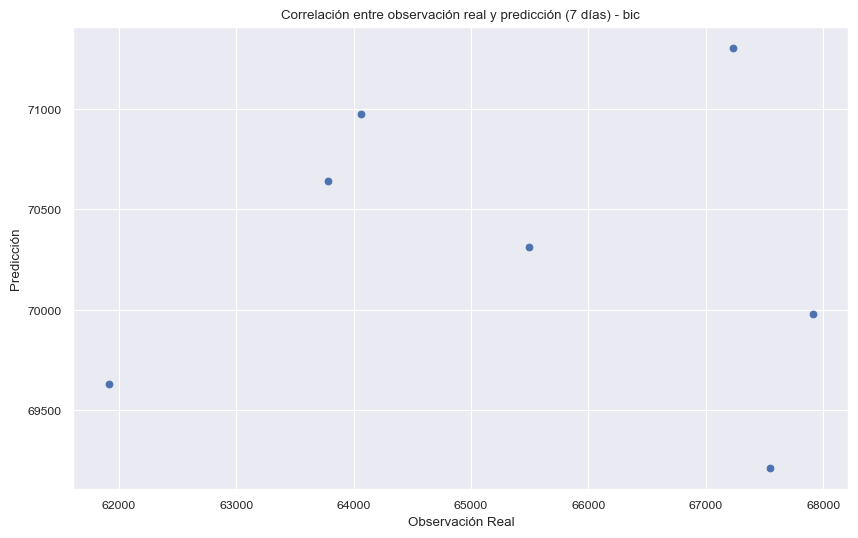

Horizonte de predicción: 7 días - Criterio de información: hqic
Performing stepwise search to minimize hqic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : HQIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : HQIC=5833.112, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : HQIC=5724.240, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : HQIC=5674.505, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : HQIC=5829.620, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : HQIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : HQIC=5668.488, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : HQIC=5678.851, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.27 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : HQIC=5665.230, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : HQIC=5671.230, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : HQIC=5675.444, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : HQI

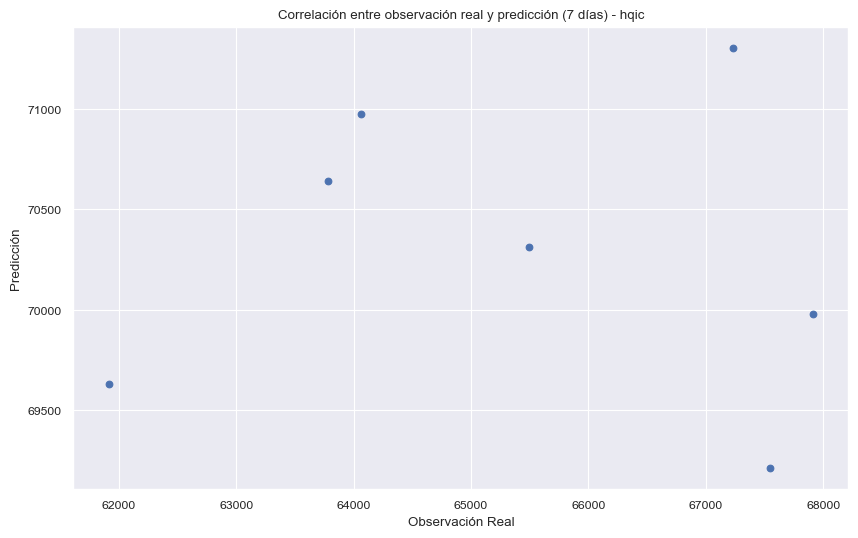

Horizonte de predicción: 14 días - Criterio de información: aic
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.0

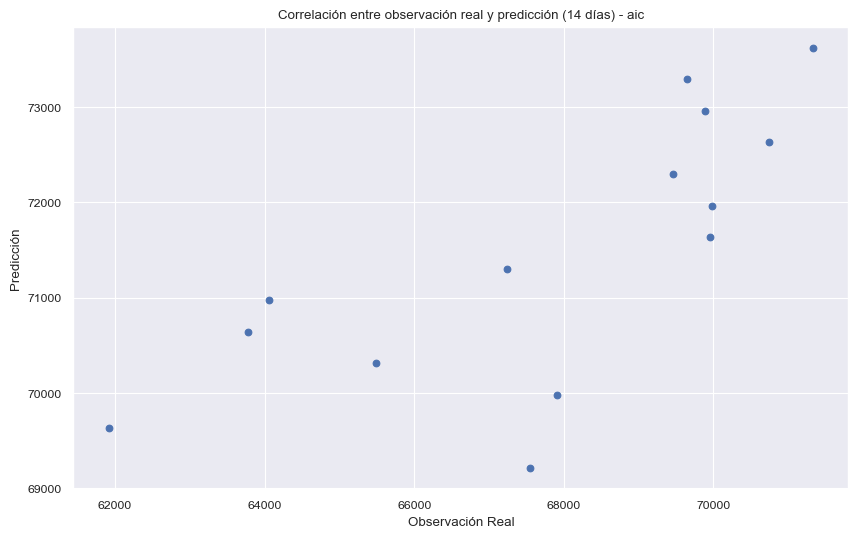

Horizonte de predicción: 14 días - Criterio de información: bic
Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=5837.699, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=5731.120, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=5681.386, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=5831.913, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : BIC=5677.662, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : BIC=5690.318, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.27 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : BIC=5672.110, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : BIC=5675.818, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : BIC=5684.618, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : BIC=inf, Time=0.1

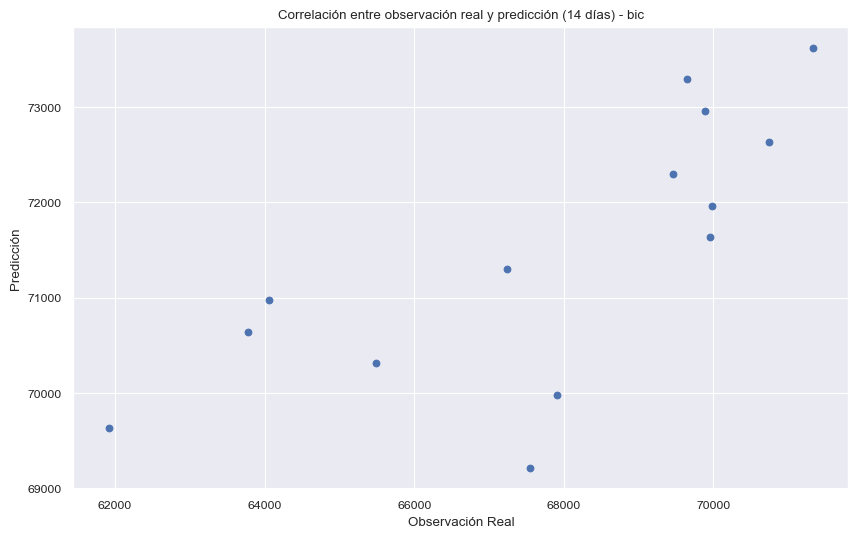

Horizonte de predicción: 14 días - Criterio de información: hqic
Performing stepwise search to minimize hqic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : HQIC=inf, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : HQIC=5833.112, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : HQIC=5724.240, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : HQIC=5674.505, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : HQIC=5829.620, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : HQIC=inf, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : HQIC=5668.488, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : HQIC=5678.851, Time=0.17 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.36 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0]             : HQIC=5665.230, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : HQIC=5671.230, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : HQIC=5675.444, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : HQ

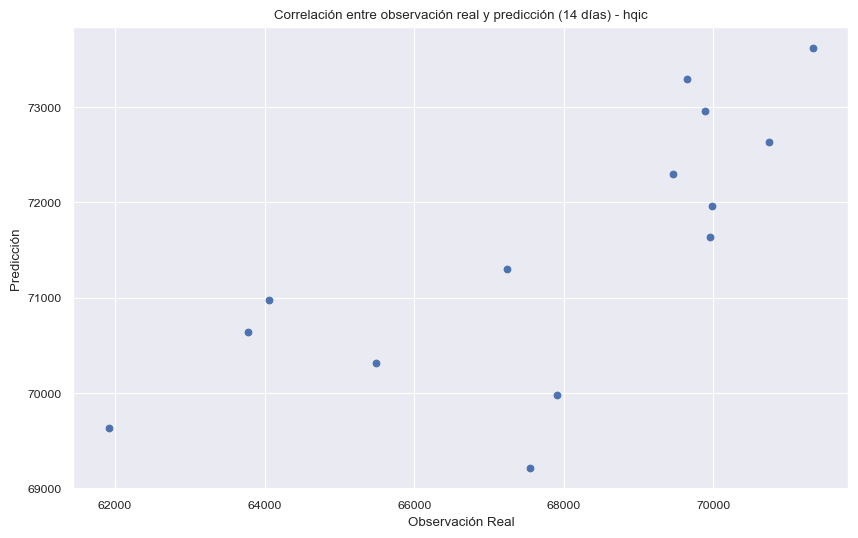

Horizonte de predicción: 21 días - Criterio de información: aic
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.0

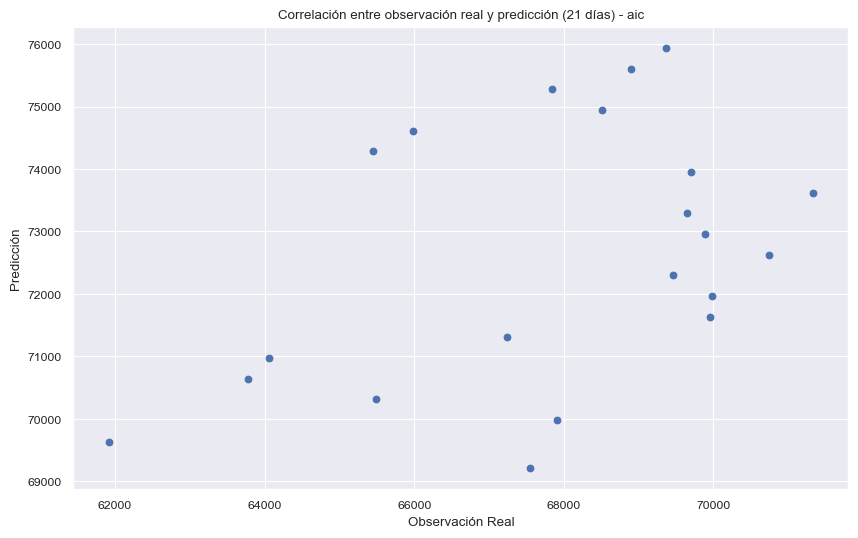

Horizonte de predicción: 21 días - Criterio de información: bic
Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=5837.699, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=5731.120, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=5681.386, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=5831.913, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : BIC=5677.662, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : BIC=5690.318, Time=0.18 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.26 sec
 ARIMA(0,2,2)(0,0,0)[0]             : BIC=5672.110, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : BIC=5675.818, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : BIC=5684.618, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : BIC=inf, Time=0.0

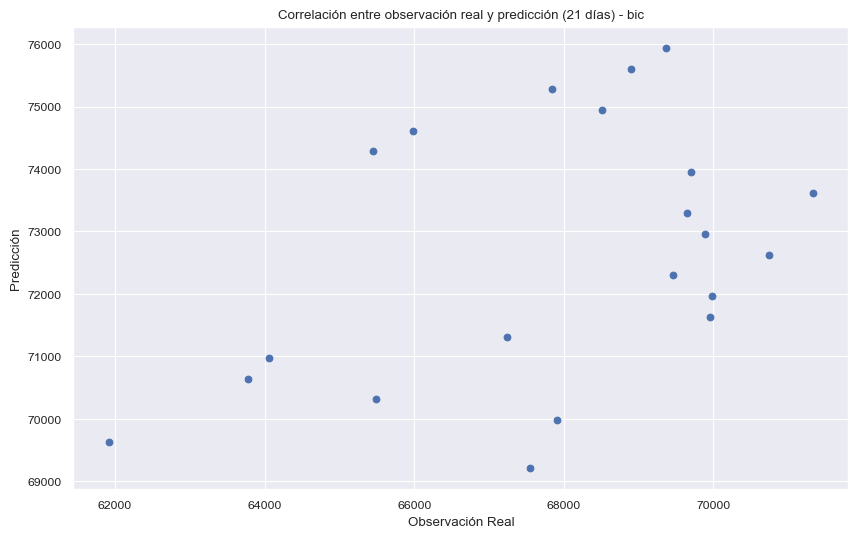

Horizonte de predicción: 21 días - Criterio de información: hqic
Performing stepwise search to minimize hqic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : HQIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : HQIC=5833.112, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : HQIC=5724.240, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : HQIC=5674.505, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : HQIC=5829.620, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : HQIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : HQIC=5668.488, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : HQIC=5678.851, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.38 sec
 ARIMA(0,2,2)(0,0,0)[0]             : HQIC=5665.230, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : HQIC=5671.230, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : HQIC=5675.444, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : HQ

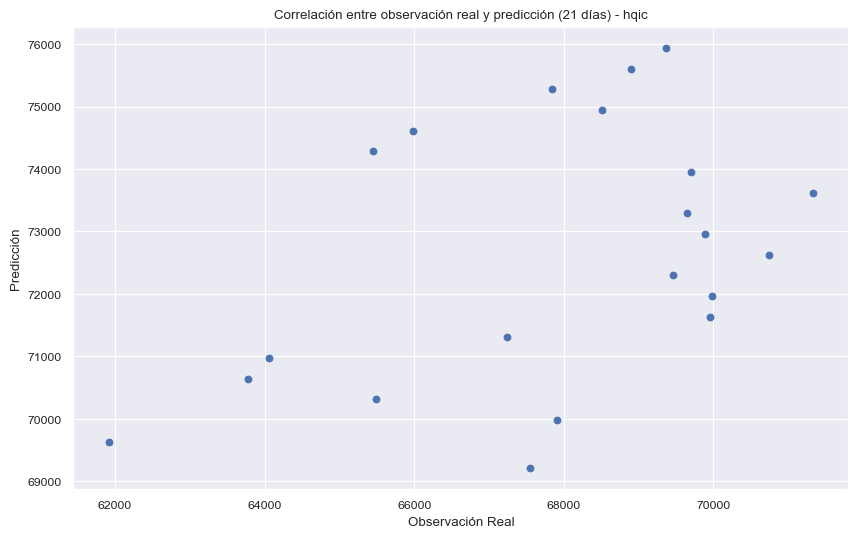

Horizonte de predicción: 28 días - Criterio de información: aic
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.23 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.0

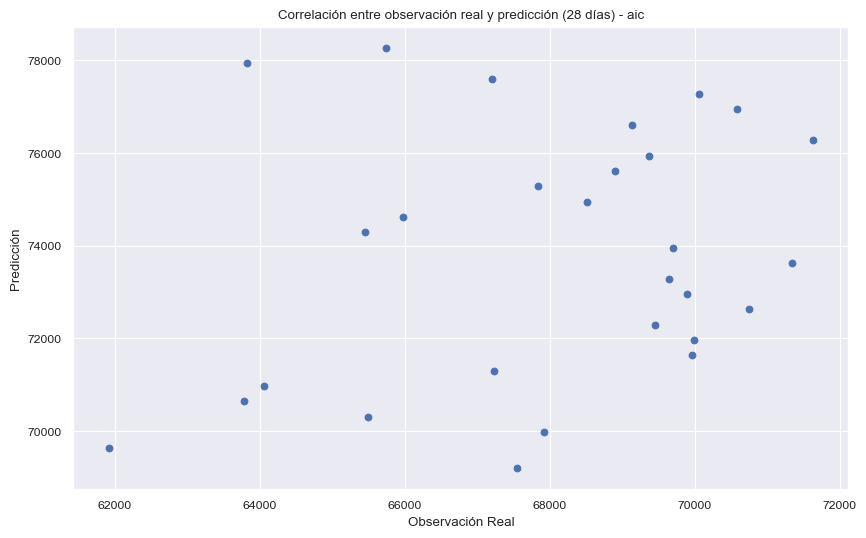

Horizonte de predicción: 28 días - Criterio de información: bic
Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=5837.699, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=5731.120, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=5681.386, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=5831.913, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : BIC=5677.662, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : BIC=5690.318, Time=0.17 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : BIC=inf, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0]             : BIC=5672.110, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : BIC=5675.818, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : BIC=5684.618, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : BIC=inf, Time=0.0

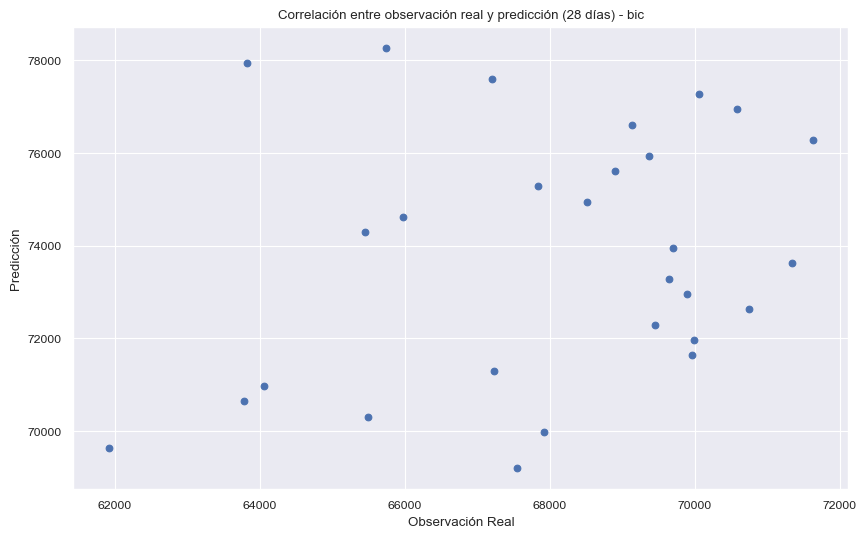

Horizonte de predicción: 28 días - Criterio de información: hqic
Performing stepwise search to minimize hqic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : HQIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : HQIC=5833.112, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : HQIC=5724.240, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : HQIC=5674.505, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : HQIC=5829.620, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : HQIC=inf, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : HQIC=5668.488, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : HQIC=5678.851, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.32 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : HQIC=inf, Time=0.28 sec
 ARIMA(0,2,2)(0,0,0)[0]             : HQIC=5665.230, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : HQIC=5671.230, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : HQIC=5675.444, Time=0.12 sec
 ARIMA(0,2,3)(0,0,0)[0]             : HQ

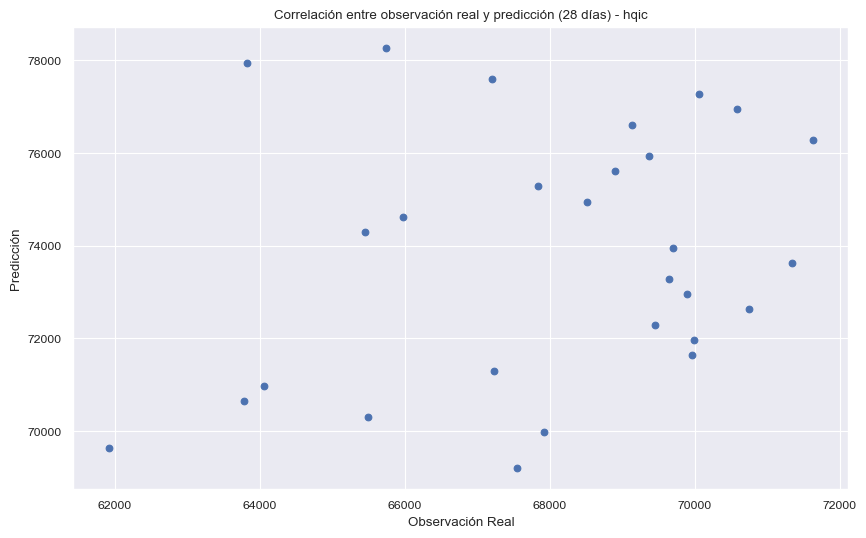

In [76]:
# Almacenar los resultados
results = []
# Iterar sobre cada horizonte de predicción
for horizon in horizons:
    # Modelado ARIMA con diferentes criterios de información
    for criterion in aic_criteria:
        print(f"Horizonte de predicción: {horizon} días - Criterio de información: {criterion}")
        
        # Ajuste del modelo ARIMA
        model = auto_arima(train, seasonal=False, trace=True, information_criterion=criterion)
        
        model.fit(train)
        
        # Predicciones
        forecast = model.predict(n_periods=horizon)
        
        # Evaluar predicciones
        mae = mean_absolute_error(test[:horizon], forecast)
        mse = mean_squared_error(test[:horizon], forecast)
        mape = np.mean(np.abs((forecast - test[:horizon]) / test[:horizon])) * 100
        rmse = np.sqrt(mse)
        r2 = r2_score(test[:horizon], forecast)

        # Almacenar resultados
        results.append({
            'Horizonte': horizon,
            'Criterio de Información': criterion,
            'MAE': mae,
            'MSE': mse,
            'MAPE': mape,
            'RMSE': rmse,
            'R2 Score': r2,
            'Predicciones': forecast,
            'Modelo': model
            })

        # Imprimir resultados
        print(f"Forecast: {forecast}")
        print('Mean Absolute Error:', mae)
        print('Mean Squared Error:', mse)
        print('Mean Absolute Percentage Error:', mape)
        print('Root Mean Squared Error:', rmse)
        print('R2 Score:', r2)
        print("\n")

        # Tabla de error
        error_table = pd.DataFrame({'MAE': [mae],
                                    'MSE': [mse],
                                    'MAPE': [mape],
                                    'RMSE': [rmse],
                                    'R2 Score': [r2]},
                                    index=[f"{horizon} días - {criterion}"])
        print("Tabla de error:")
        print(error_table)
        print("\n")

        # Gráfico de correlación entre observación real y predicción
        plt.scatter(test[:horizon], forecast)
        plt.title(f'Correlación entre observación real y predicción ({horizon} días) - {criterion}')
        plt.xlabel('Observación Real')
        plt.ylabel('Predicción')
        plt.show()

Para las predicciones de 7 días, el Error Absoluto Medio (MAE) fue de 4872.99, el Error Cuadrático Medio (MSE) fue de 2.875395e+07, el Error Porcentual Absoluto Medio (MAPE) fue del 7.56%, la Raíz del Error Cuadrático Medio (RMSE) fue de 5362.27, y el coeficiente de determinación (R2 Score) fue de -5.51731.
Para las predicciones de 14 días, el MAE fue de 3678.58, el MSE fue de 1.768565e+07, el MAPE fue del 5.55%, el RMSE fue de 4205.43, y el R2 Score fue de -1.217546.
Para las predicciones de 21 días, el MAE fue de 4780.89, el MSE fue de 2.874065e+07, el MAPE fue del 7.14%, el RMSE fue de 5361.03, y el R2 Score fue de -3.706742.
Para las predicciones de 28 días, el MAE fue de 5824.39, el MSE fue de 4.417591e+07, el MAPE fue del 8.69%, el RMSE fue de 6646.50, y el R2 Score fue de -5.974346.

#analisis

In [87]:
from scipy.stats import shapiro, normaltest
from statsmodels.stats.stattools import durbin_watson
horizons = [7, 14, 21, 28]
# Almacenar los resultados
results = []

# Iterar sobre cada horizonte de predicción
for horizon in horizons:
    print(f"Horizonte de predicción: {horizon} días")
    
    # Ajuste del modelo ARIMA
    model = auto_arima(train, seasonal=False, trace=True)
    model.fit(train)
    forecast = model.predict(n_periods=horizon)
    residuals = test[:horizon] - forecast
    
    # Prueba de normalidad (Shapiro-Wilk)
    shapiro_test_stat, shapiro_p_value = shapiro(residuals)
    print("Shapiro-Wilk Test:")
    print("Test Statistic:", shapiro_test_stat)
    print("p-value:", shapiro_p_value)
    if shapiro_p_value > 0.05:
        print("Los residuos se distribuyen normalmente (no se rechaza H0)")
    else:
        print("Los residuos no se distribuyen normalmente (se rechaza H0)")
    
    # Prueba de normalidad (D'Agostino's K^2 Test)
    if len(residuals) >= 8:
        dagostino_test_stat, dagostino_p_value = normaltest(residuals)
        print("D'Agostino's K^2 Test:")
        print("Test Statistic:", dagostino_test_stat)
        print("p-value:", dagostino_p_value)
        if dagostino_p_value > 0.05:
            print("Los residuos se distribuyen normalmente (no se rechaza H0)")
        else:
            print("Los residuos no se distribuyen normalmente (se rechaza H0)")
    else:
        print("No hay suficientes muestras para realizar la prueba de normalidad.")

    # Prueba de independencia (Durbin-Watson)
    durbin_watson_stat = durbin_watson(residuals)
    print("Durbin-Watson Test:")
    print("Estadística de Durbin-Watson:", durbin_watson_stat)
    if durbin_watson_stat >= 1.5 and durbin_watson_stat <= 2.5:
        print("Los residuos son independientes (no autocorrelación)")
    else:
        print("Los residuos no son independientes (autocorrelación)")

    print("\n")


Horizonte de predicción: 7 días
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5830.071, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5719.678, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5669.943, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5828.099, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5662.405, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5671.248, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=5660.668, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=5668.189, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=5669.362, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]   

Horizonte de predicción de 7 días:

El modelo ARIMA(1,2,1) se identificó como el mejor modelo para predecir 7 días en el futuro, basado en el criterio de información de Akaike (AIC). Este modelo utiliza una combinación de información sobre los valores pasados y los errores pasados para hacer predicciones.
La prueba de normalidad de Shapiro-Wilk indica que los residuos (diferencia entre los valores observados y los predichos) del modelo no siguen estrictamente una distribución normal. Sin embargo, la prueba de D'Agostino sugiere lo contrario.
El test de Durbin-Watson muestra que los residuos no son completamente independientes, lo que sugiere que aún podría haber alguna estructura temporal que no está siendo capturada por el modelo.
Horizonte de predicción de 14 días:

El mismo modelo ARIMA(1,2,1) fue identificado como el mejor para un horizonte de predicción de 14 días.
En este caso, los residuos no pasaron la prueba de normalidad de Shapiro-Wilk, lo que indica que no se ajustan bien a una distribución normal. Sin embargo, la prueba de D'Agostino sugiere lo contrario.
Se encontró autocorrelación en los residuos según el test de Durbin-Watson, lo que indica que el modelo podría no estar capturando completamente la estructura temporal de los datos.
Horizonte de predicción de 21 días:

Nuevamente, el modelo ARIMA(1,2,1) fue el mejor.
En este caso, los residuos no pasaron las pruebas de normalidad de Shapiro-Wilk y D'Agostino.
La prueba de Durbin-Watson también indicó autocorrelación en los residuos.
Horizonte de predicción de 28 días:

El modelo ARIMA(1,2,1) se identificó como el mejor una vez más.
Los residuos pasaron las pruebas de normalidad de Shapiro-Wilk y D'Agostino.
Sin embargo, la autocorrelación en los residuos aún se observó según el test de Durbin-Watson.